In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Text(0, 0.5, 'Output intensity')

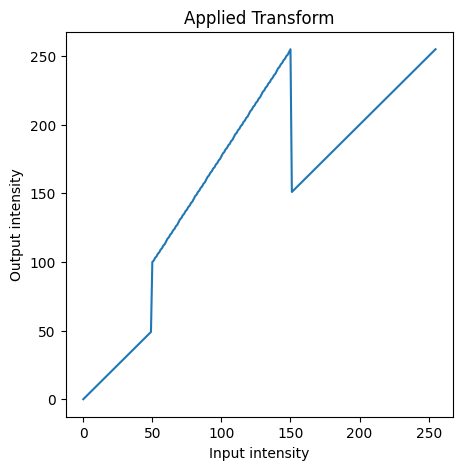

In [3]:
# Question 1

x_start, x_end = 50, 150
y_start, y_end = 100, 255

transform = np.arange(0, 256).astype(np.uint8)
transform[x_start: x_end+1] = np.linspace(y_start, y_end, (x_end - x_start + 1), np.uint8)

plt.figure(figsize = (5, 5))
plt.plot(transform)
plt.title("Applied Transform")
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")

(-0.5, 719.5, 809.5, -0.5)

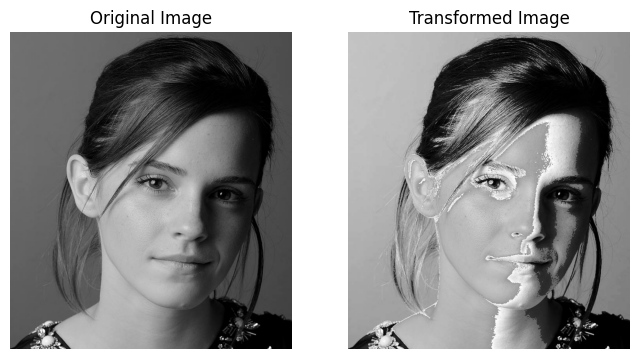

In [4]:
img1 = cv.imread( "images/emma.jpg", cv.IMREAD_GRAYSCALE)
transformed_img1 = transform[img1]

plt.figure(figsize = (8, 8))
plt.subplot(121)
plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.subplot(122)
plt.imshow(cv.cvtColor(transformed_img1, cv.COLOR_BGR2RGB))
plt.title("Transformed Image")
plt.axis('off')

Text(0, 0.5, 'Output intensity')

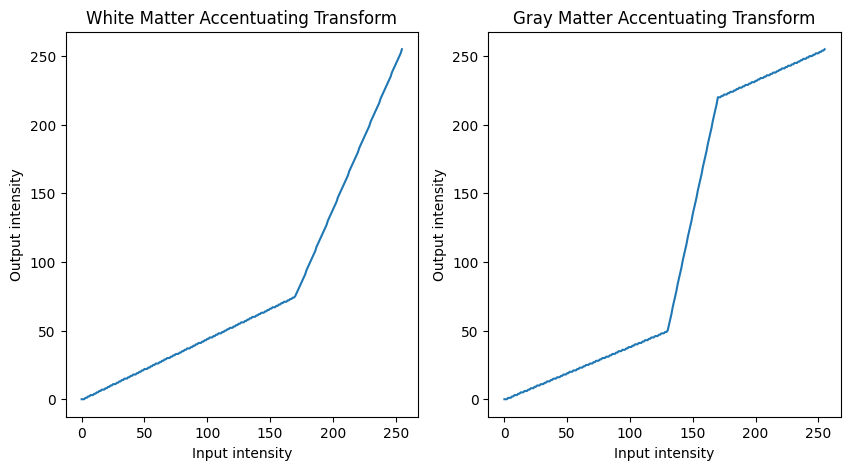

In [5]:
# Question 2

# White matter
x_midpoint = 170
y_midpoint = 75

white_transform = np.arange(0, 256).astype(np.uint8)
white_transform[0:x_midpoint + 1] = np.linspace(0, y_midpoint, x_midpoint + 1, np.uint8)
white_transform[x_midpoint:256] = np.linspace(y_midpoint, 255, (256 - x_midpoint), np.uint8)

# Grey matter
x1, x2 = 130, 170
y1, y2 = 50, 220

grey_transform = np.arange(0, 256).astype(np.uint8)
grey_transform[0:x1 + 1] = np.linspace(0, y1, x1 + 1, np.uint8)
grey_transform[x1:x2 + 1] = np.linspace(y1, y2, (x2 + 1 - x1), np.uint8)
grey_transform[x2:256] = np.linspace(y2, 255, (256 - x2), np.uint8)

plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.plot(white_transform)
plt.title("White Matter Accentuating Transform")
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")

plt.subplot(122)
plt.plot(grey_transform)
plt.title("Gray Matter Accentuating Transform")
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")

(-0.5, 180.5, 216.5, -0.5)

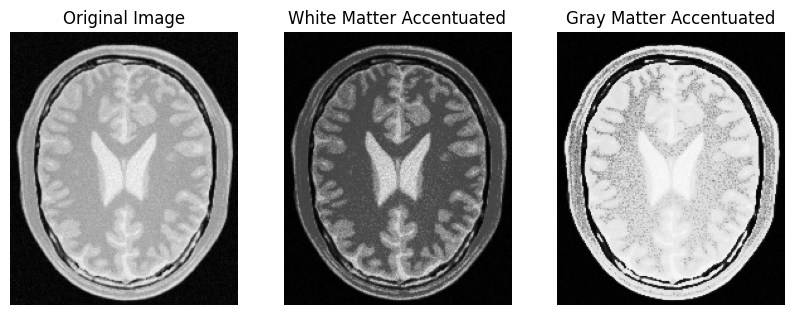

In [6]:
img2 = cv.imread( "images/BrainProtonDensitySlice9.png", cv.IMREAD_GRAYSCALE)
white_img2 = white_transform[img2]
gray_img2 = grey_transform[img2]

plt.figure(figsize = (10, 10))
plt.subplot(131)
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.subplot(132)
plt.imshow(cv.cvtColor(white_img2, cv.COLOR_BGR2RGB))
plt.title("White Matter Accentuated")
plt.axis('off')
plt.subplot(133)
plt.imshow(cv.cvtColor(gray_img2, cv.COLOR_BGR2RGB))
plt.title("Gray Matter Accentuated")
plt.axis('off')

(-0.5, 719.5, 479.5, -0.5)

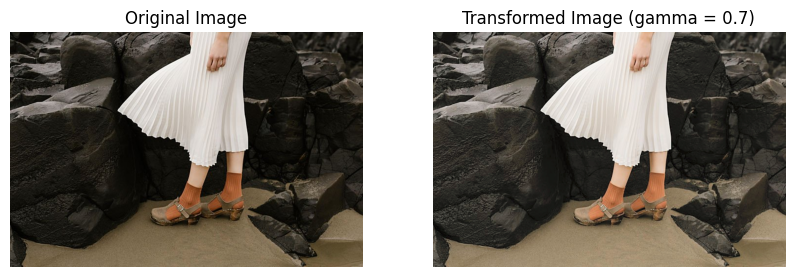

In [7]:
# Question 3

gamma = 0.7
gamma_transform = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')

img3 = cv.imread( "images/highlights_and_shadows.jpg", cv.IMREAD_COLOR)
img3_lab = cv.cvtColor(img3, cv.COLOR_BGR2LAB)
# In the LAB colour space, the L plane encodes brightness only

img3_lab[:, :, 0] = gamma_transform[img3_lab[:, :, 0]]

plt.figure(figsize = (10, 10))
plt.subplot(121)
plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.subplot(122)
plt.imshow(cv.cvtColor(img3_lab, cv.COLOR_LAB2RGB))
plt.title(f"Transformed Image (gamma = {gamma})")
plt.axis('off')



In [8]:
def histBGR(img):
    # Define colors (b for blue, g for green, r for red)
    colors = ('b', 'g', 'r')

    # Loop over color channels and calculate histograms
    for i, color in enumerate(colors):
        hist = cv.calcHist([img], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])

Text(0, 0.5, 'Count')

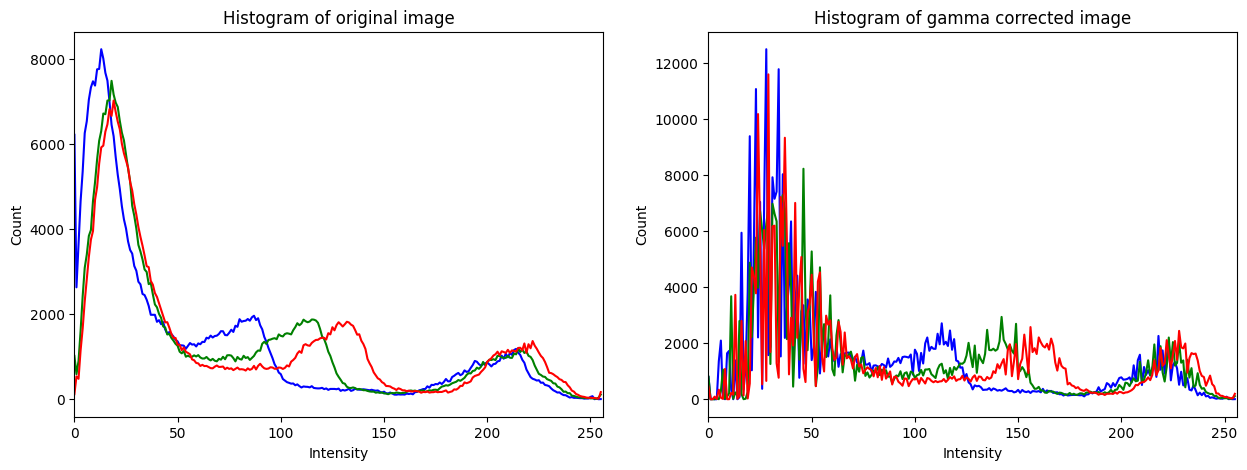

In [9]:
plt.figure(figsize = (15, 5))

plt.subplot(121)
histBGR(img3)
plt.title("Histogram of original image")
plt.xlabel("Intensity")
plt.ylabel("Count")

plt.subplot(122)
histBGR(cv.cvtColor(img3_lab, cv.COLOR_LAB2BGR))
plt.title("Histogram of gamma corrected image")
plt.xlabel("Intensity")
plt.ylabel("Count")

Text(0, 0.5, 'Output intensity')

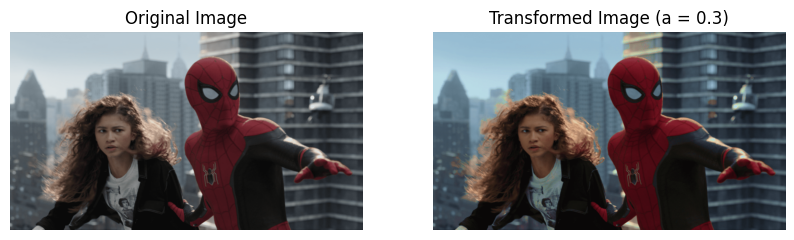

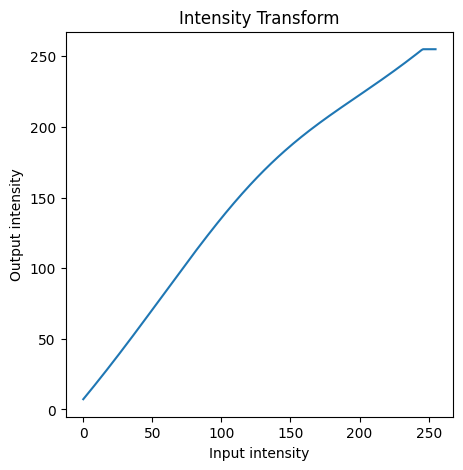

In [17]:
# Question 4
a = 0.3
sigma = 70
def f(x):
    return np.minimum(255, x + (a*128) * np.exp(-(x - 128)**2 / (2 * sigma**2)))

img4 = cv.imread( "images/spider.png", cv.IMREAD_COLOR)
img4_hsv = cv.cvtColor(img4, cv.COLOR_BGR2HSV)
# In the LAB colour space, the L plane encodes brightness only
img4_hsv[:, :, 1] = f(img4_hsv[:, :, 1])
plt.figure(figsize = (10, 10))
plt.subplot(121)
plt.imshow(cv.cvtColor(img4, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.subplot(122)
plt.imshow(cv.cvtColor(img4_hsv, cv.COLOR_HSV2RGB))
plt.title(f"Transformed Image (a = {a})")
plt.axis('off')

plt.figure(figsize = (5, 5))
transform_vibrance = [f(x) for x in range(256)]
plt.plot(transform_vibrance)
plt.title("Intensity Transform")
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")

Text(0.5, 1.0, 'Histogram after equalization')

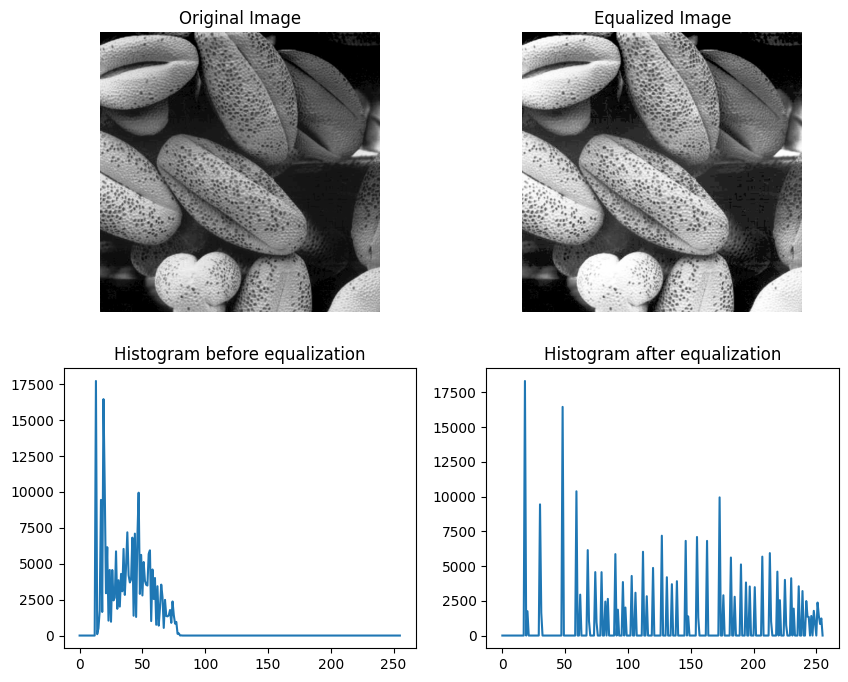

In [30]:
# Question 5

def hist_equalize(image):
    total = image.shape[0] * image.shape[1]
    hist, bins = np.histogram(image.ravel(), 256, [0, 256])
    cdf = hist.cumsum()
    transform = cdf * 255 / total
    equalized_image = transform[image]
    return equalized_image

img5 = cv.imread( "images/shells.tif", cv.IMREAD_GRAYSCALE)
equalized_img5 = hist_equalize(img5)

before_hist, _ = np.histogram(img5.ravel(), 256, [0, 256])
after_hist, _ = np.histogram(equalized_img5.ravel(), 256, [0, 256])

plt.figure(figsize = (10, 8))
plt.subplot(221)
plt.imshow(img5, cmap = 'gray')
plt.title("Original Image")
plt.axis('off')
plt.subplot(222)
plt.imshow(equalized_img5, cmap = 'gray')
plt.title("Equalized Image")
plt.axis('off')
plt.subplot(223)
plt.plot(before_hist)
plt.title("Histogram before equalization")
plt.subplot(224)
plt.plot(after_hist)
plt.title("Histogram after equalization")

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0, 17718,    96,   506,  1750,  9441,
        1642, 16457, 10381,  2945,  6149,  1038,  4566,   961,  4562,
        2446,  2641,  5860,  1861,  3850,  2016,  4290,  3081,  6031,
        2830,  4868,  7185,  4197,  3696,  3911,  6814,  1379,  7094,
        1295,  6812,  9944,  2898,  5615,  2791,  5118,  3819,  3533,
        3482,  5679,  5933,  1008,  4599,  2546,  4007,   752,  3433,
         690,  1939,  3544,  2668,   533,  2482,  1359,  1336,  1408,
        1778,   884,  2373,  1419,   830,   949,   116,   150,     5,
          10,     0,     1,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,